# Step 1: Installation and Setup

In [1]:
!pip install --upgrade pip setuptools

In [5]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.9 MB/s eta 0:00:00
Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: tensorboard
    Found existing installation

In [6]:
import tensorflow as tf


In [7]:
print(tf.__version__)

2.17.0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [9]:
# importing dataset
from tensorflow.keras.datasets import fashion_mnist

In [10]:
# loading the dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [14]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# maximum value
np.max(x_train)

255

In [17]:
np.min(x_train), np.mean(x_train)

(0, 72.94035223214286)

In [19]:
np.max(y_train),np.min(y_train), np.mean(y_train)

(9, 0, 4.5)

we have pixel from 0 to 255 (x value max and min )and classes from 0 to 9 (y value max and min)

In [20]:
# Entering all the classes
class_names = ['0 Top/T-shirt' , '1 Trouser' , '2 Pullover' , ' 3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker' , '8 bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', ' 3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 bag', '9 Ankle boot']


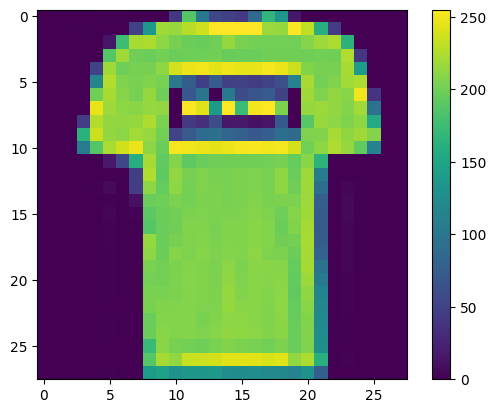

In [23]:
# Data exploration
plt.figure()
plt.imshow(x_train[1])

# adding colorbar which is from 0 to 255
plt.colorbar()

In [22]:
# to confirm the above
# find y_train 1 and then check the result int he above class

y_train[1]

0

0 is the class of top/t-shirt therefore this is true

In x_train we have data and in y_train we have labels

In [24]:
# Normalizing the dataset
# after normalization the model run faster

x_train = x_train / 255.0
x_test = x_test / 255.0

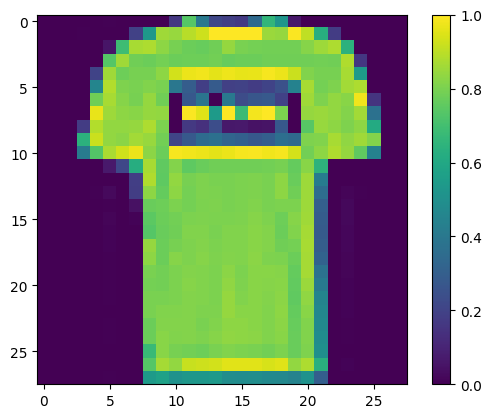

In [25]:
# Data exploration
plt.figure()
plt.imshow(x_train[1])

# adding colorbar which is from 0 to 255
plt.colorbar()

After normalization the bar is from 0 to 1

In [26]:
# Flattening the dataset
# converting 60k 2D arrays into 60k 1D arrays

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Converting the 28*28 dataset into 1D vector

In [27]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

We have done this because artificial neural networks takes input in this way

In [28]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Step 3: Building the Model

In [29]:
# Defining an object
model = tf.keras.models.Sequential()
# Sequence of layers

In [30]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function as ReLU (Rectified Linear Unit)
# 3) input shape = 784 (Because we have flatten the dataset)

# to add first layer to our model we have to use .add method
model.add(tf.keras.layers.Dense(units= 128, activation='relu', input_shape=(784,)))

# adding input shape as 784, to show it as vector

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Adding the second layer with dropout
# to stop the overfitting
# it is a regularisation technique
model.add(tf.keras.layers.Dropout(0.3))


In [32]:
# adding the output layer
# have to add only 2 parameters
# 1) units(no of neurons) = 10 (because only 10 class are outputs )
# 2) activation function = softmax (because we want multiple outputs)

# for binary output we use sigmoid activation function

model.add(tf.keras.layers.Dense(units=10, activation= 'softmax'))

# Step 4: Training the model

In [34]:
# Compiling the model
# 1) Optimizer = adam, (it minimizes the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) matrices = sparse_categorical_accuracy (to check the accuracy)

# for binary output we use matrices as accuracy

model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy', metrics =['sparse_categorical_accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Trainig the model
# In x_train we have images and in y_train we have labels of that images
# epochs means the number of times we are going to train our model

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.6995 - sparse_categorical_accuracy: 0.7549
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4223 - sparse_categorical_accuracy: 0.8451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3864 - sparse_categorical_accuracy: 0.8615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3695 - sparse_categorical_accuracy: 0.8643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3484 - sparse_categorical_accuracy: 0.8741
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.8752
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3301 - sparse_categorical_accuracy: 0.8768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3206 - sparse_categorical_accuracy: 0.8823
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3115 - sparse_categorical_accuracy: 0.8843
Epoch 10/10
1875/1875 ━━━━━━━━━━━

# Step 5: Model Evaluation and Prediction

In [37]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3341 - sparse_categorical_accuracy: 0.8794


We are know checking the accuracy on the test data and it is showing accuracy nearly equal to that on train data , this means our model model is working fine.

In [44]:
# Model Prediction
# model.predict(x_test) gives you the probability distributions for each class
y_pred = model.predict(x_test)

# np.argmax(y_pred, axis=1) gives you the class with the highest probability,
# which is the equivalent of predict_classes
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [43]:
print(y_pred)

[[2.0092891e-08 5.0031068e-10 4.9006112e-11 ... 2.8132742e-02
  4.6356199e-08 9.7108978e-01]
 [2.5789659e-06 2.8311381e-17 9.9782413e-01 ... 9.3078902e-21
  1.4064508e-09 6.7656860e-18]
 [7.0298871e-11 9.9999994e-01 2.1896306e-12 ... 1.0505299e-35
  2.2608944e-17 1.7979621e-24]
 ...
 [9.8589435e-06 5.6737427e-13 1.4660267e-07 ... 3.5157646e-13
  9.9998528e-01 1.5107559e-14]
 [2.1481346e-08 9.9999362e-01 3.9652739e-10 ... 9.4157525e-21
  4.0608408e-10 3.1965755e-15]
 [7.5364171e-04 2.7301212e-06 3.7208709e-05 ... 1.6344909e-02
  7.1788803e-03 1.2848683e-04]]


In [45]:
print(y_pred_classes)

[9 2 1 ... 8 1 5]


In [47]:
y_pred_classes[0]

9

In [48]:
y_test[0]

9

The above y_pred_classes is the predicted output and y_ test equals 9 is real output which is correct in this case means the model is working fine

In [49]:
y_pred_classes[110], y_test[110]

(2, 2)

In [50]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred_classes)
print(cm)

[[811   1   9  34   5   0 127   0  13   0]
 [  4 963   1  23   3   0   4   0   2   0]
 [ 14   0 779  11 105   0  90   0   1   0]
 [ 23   4   9 892  33   0  35   0   4   0]
 [  0   1  83  28 829   0  58   0   1   0]
 [  0   0   0   1   0 946   0  29   1  23]
 [110   1  89  32  71   0 682   0  15   0]
 [  0   0   0   0   0  12   0 964   0  24]
 [  2   0   2   5   4   1   4   4 978   0]
 [  0   0   0   0   0   0   1  41   0 958]]


The Diagonal elements are the correct predictions and other elements are the wrong predictions

In [53]:
# using this confusion matrix calculating the accuracy

acc_cm = accuracy_score(y_test,y_pred_classes)
print(acc_cm)

0.8802
